In [3]:
import sys
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import numpy as np
from tqdm.notebook import tqdm
import argparse
from torch.utils.data import Dataset
import pickle
import random
from utils import PklsFolder
from model import C_LSTM
from sklearn import metrics
import matplotlib.pyplot as plt

def normalize(x):
    return (x / 255) -0.5

## Seed setting

In [21]:
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)
random.seed(seed)

## Load Dataset

In [ ]:
# You have to implement dataset loading code
flow_dataset = 
test_set_idx = np.load('')
test_random_sampler = torch.utils.data.SubsetRandomSampler(test_set_idx)
test_dataloader = DataLoader(flow_dataset,batch_size=512, shuffle=False, sampler = test_random_sampler, num_workers=20)

In [22]:
criterion = nn.BCELoss()

(Epoch 34) Model loaded in eval mode


  0%|          | 0/1675 [00:00<?, ?it/s]

AUC: 0.257642 (34)


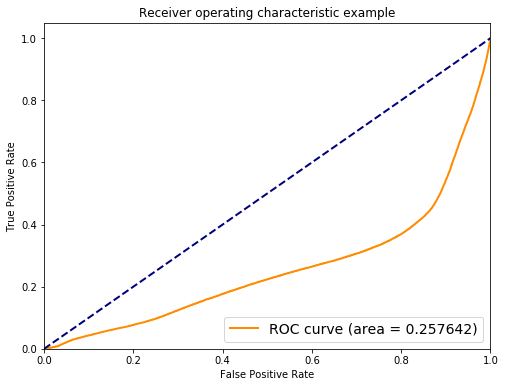

AUC: 0.257642
AUC list: [0.25764235]


In [23]:
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)
random.seed(seed)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = C_LSTM().to(device)
weight_path = ''

checkpoint = torch.load('') # Loading weights
model.load_state_dict(checkpoint['state'])
model.eval()

score_list = []
target_list = []
label_list = []
loss = 0

for batch_id, (test_x, test_y, target) in enumerate(tqdm(test_dataloader)):
    target_list.extend(target.tolist())
    label_list.extend(test_y.tolist())
    with torch.no_grad():
        num_data = test_x.shape[0]
        test_x, test_y = test_x.float().to(device), test_y.float().to(device)
        test_x = normalize(test_x)

        preds = model(test_x.to(device)).reshape(-1)
        batch_loss = criterion(preds, test_y)
        loss += batch_loss.item()
        score_list.extend(preds.detach().cpu().tolist())

loss_list_test.append(loss)
score_list = np.array(score_list)
label_list = np.array(label_list)
target_list = np.array(target_list)

fpr, tpr, thresholds = metrics.roc_curve(label_list, score_list)

print('AUC: %.6f'%(metrics.auc(fpr, tpr))
auc_list_test.append(metrics.auc(fpr, tpr))

plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.6f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right", fontsize=14)

plt.show()

print('AUC: %.6f'%metrics.auc(fpr, tpr))